In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
sns.set()

In [3]:
os.getcwd()
os.chdir('/content/drive/MyDrive')

In [5]:
data = pd.read_csv('advertising.csv')

In [6]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


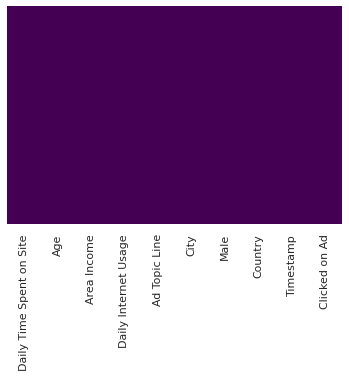

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [9]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


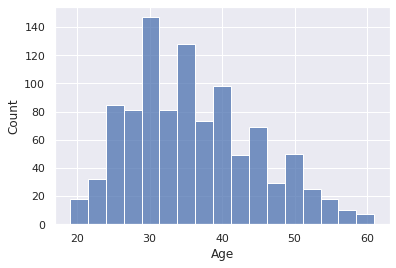

In [10]:
sns.histplot(data['Age'])

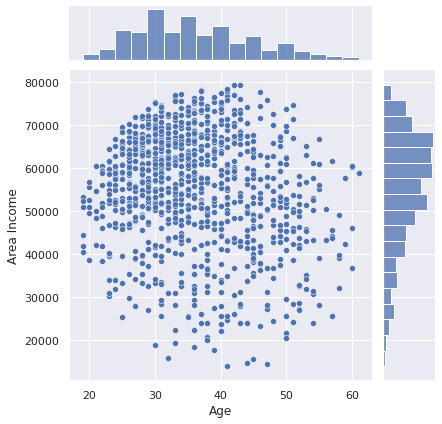

In [11]:
sns.jointplot(x='Age', y='Area Income', data = data, kind = 'scatter')

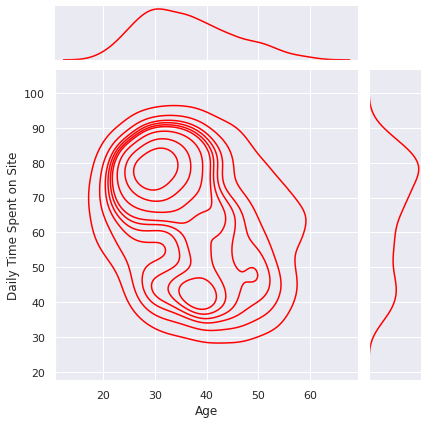

In [12]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data = data, kind = 'kde', color = 'red')

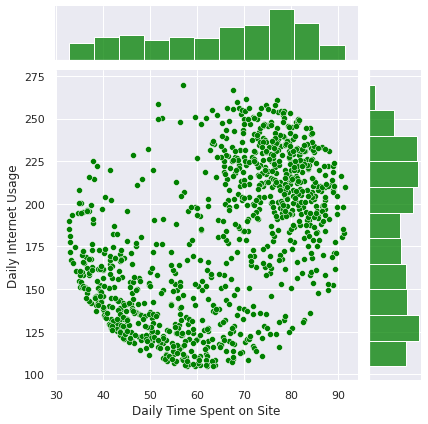

In [13]:
sns.jointplot(x='Daily Time Spent on Site', y ='Daily Internet Usage', data = data, kind = 'scatter', color = 'green')

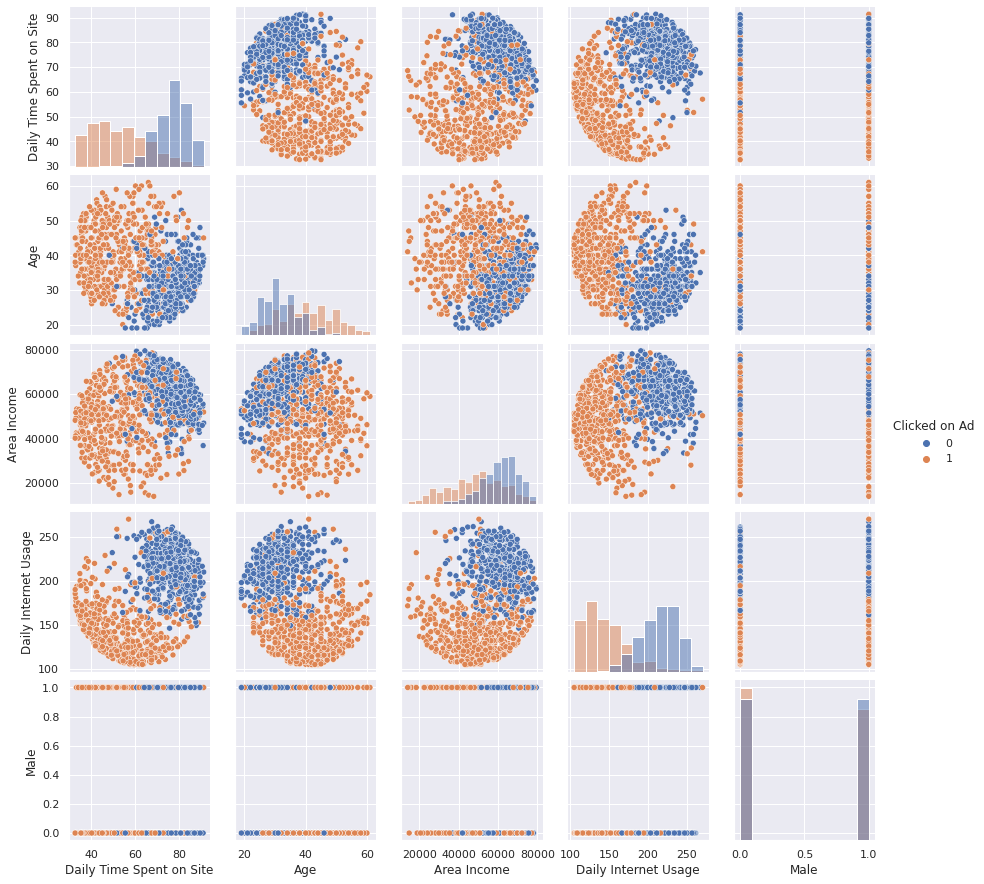

In [14]:
sns.pairplot(data, hue='Clicked on Ad', diag_kind = 'hist')

In [22]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
y = y_train
x1 = X_train

In [24]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.108415
         Iterations 9


In [25]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked on Ad   No. Observations:                  670
Model:                          Logit   Df Residuals:                      665
Method:                           MLE   Df Model:                            4
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.8436
Time:                        14:30:23   Log-Likelihood:                -72.638
converged:                       True   LL-Null:                       -464.30
Covariance Type:            nonrobust   LLR p-value:                3.140e-168
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       25.0244      2.861      8.747      0.000      19.417      30.632
Daily Time Spent on Site    -0.1716      0.023     -7.543      0.000      -0.216      -0.127
Age                          0.1381      0.028      5.009      0.000       0.084       0.192
Area Income                 -0.0001   2.11e-05     -5.615      0.000      -0.000   -7.72e-05
Daily Internet Usage        -0.0599      0.007     -8.000      0.000      -0.075      -0.045
============================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Timestamp','City','Ad Topic Line','Country','Clicked on Ad', 'Male'], axis=1), 
                                                    data['Clicked on Ad'], test_size=0.33, 
                                                    random_state=101)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
ypred = logmodel.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       171
           1       0.93      0.91      0.92       159

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330

